## Digital Image Processing: DATA 56600-002
## Image Segmentation
### Seth Howells

Image segmentation is a method which breaks down a digital image into various groups, called **segments**, in efforts to reduce the complexity of the image for easier identification and analysis. Because images are comprised of pixels, objects are likewise composed of a unique arrangement of pixels. Furthermore, the unique patterns that objects contain are computational, meaning that arrangement of pixels share some characteristics from one object to another similar object. Some of the **similarity criteria** are: intensity, color, texture, histograms, features, etc.

For these reasons, image segmentation can be thought of as the process of assigning labels to pixels. There are five techniques for image segmentation, which are listed below. This notebook will demonstrate the following image segmentation techniques: Threshold, Edge, Region, Clustering. The corresponding sections will apply these techniques to only some of the images in the image directory, but others can be simply add into the filename.

1. Clustering Based Segmentation
2. Threshold Based Segmentation
3. Edge-Based Segmentation
4. Color Based Segmentation
5. Artificial Neural Network Based Segmentation

Conclusions on Image Segmentation techniques:
Clustering: The clustering technique uncovered features in an image that would seem to be otherwise unknown to the average person. For example, at each Kth cluster, a new feature would emerge. Smallest Kth cluster showed a distinction between lightness and darkness of the pixels. Textures appear in the Kth cluster higher than the smallest. More features emerge in Kth clusters 4 and 5.

Threshold: The binarized output image grouped the scenic mountain image into two categories based on the pixel intensity values. The result was more interesting than I expected because I did not account for structural features. It appears that upright structures such as trees, tall grass, and mountains were grouped together while the river, flat grassland, and sky are in the other category.

Color-Based: This technique used color range to extract pixels that contain a value between two specified RGB points. The Manchester vs Chelsea image was chosen because it provided a great way of showing how similarity criteria can be used to assign labels to pixel values. That is, the team (color of uniform) can be distinguished from the other team based on their color pixel values.

Webcam section provides code to view color detection in real-time with your webcam. It is coded to detect red colored objects.

### Import File I/O

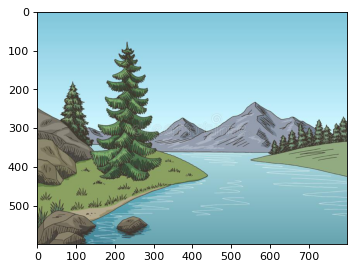

In [2]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from IPython.display import Image

# Load image from file
file = 'scenic.jpg'
filepath = '/Users/datascience/Desktop/Desktop - Mac mini/SPRING22/DIP/Week 7/ImageSeg/images'
path = os.path.join(filepath,file)
img = cv2.imread(path)

# Preprocessing
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Display image
figure(figsize=(5, 5), dpi=80)
plt.imshow(img_rgb)

In [2]:
# this converts it into RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert to graycsale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3),0)

## Clustering Based Segmentation
### Kmeans Clustering Based
Kmeans is a clustering algorithm that uses data points to group similar data points. It is an unsupervised learning algorithm that groups the data points into K number of clusters. For example if K = 2, then the data points would be partitioned into one of the two groups. Likewise, if K = 5, the data points will be partitioned into one of five groups. The Euclidean distance formula determines the assignment of data points to a cluster, in which the smallest distance between the data point to cluster centroids is assigned to the cluster.

For digital image processing, Kmeans will achieve the same goal in grouping similar pixels together and assigned to a cluster. In the example below, we see several images that compare the original image to the Kth cluster.

1. At K=2: image is segmented into two clusters. Kmeans appears to have partitioned the clusters by the lightness and darkness of the colors and not the color itself.
2. At K=3: image is further segmented into textures, e.g. trees, grass
3. At K=4: image includes color as a segment
4. At K=5: image includes some distinction in the sky and river


In [2]:
# Define kmeans clustering function, input image/cluster coefficient
def kmeans_img(image, K):
    img = image
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    twoDimage = img.reshape((-1,3))
    twoDimage = np.float32(twoDimage)

    ##Defining Parameters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = K
    attempts=10

    ##Apply K-Means
    ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))

    return result_image

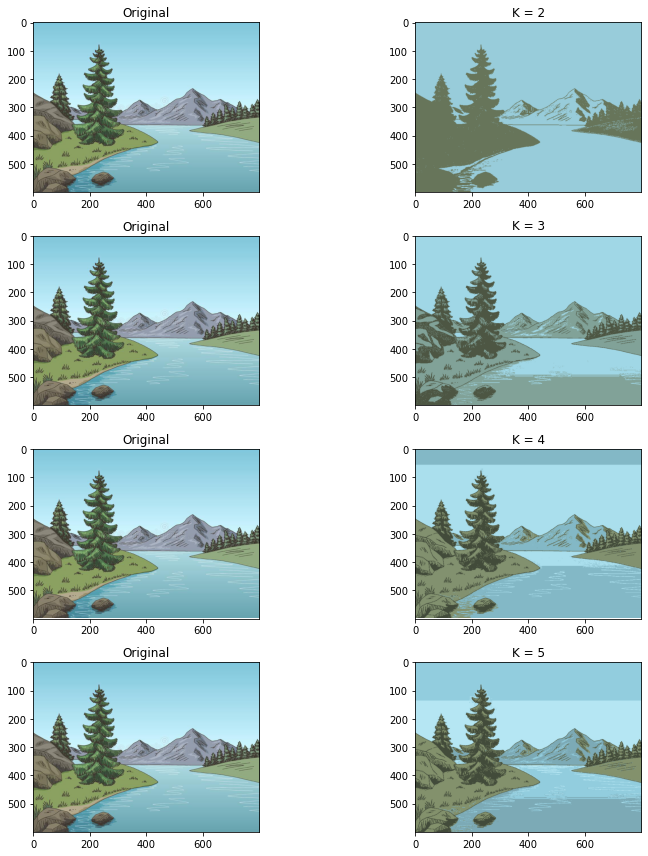

In [3]:
# Apply Kmeans
k2 = kmeans_img(img,2)
k3 = kmeans_img(img,3)
k4 = kmeans_img(img,4)
k5 = kmeans_img(img,5)

# Display original vs Kth cluster
f, axarr = plt.subplots(4,2)
axarr[0,0].imshow(img_rgb)
axarr[0,0].set_title('Original')
axarr[0,1].imshow(k2)
axarr[0,1].set_title('K = 2')

axarr[1,0].imshow(img_rgb)
axarr[1,0].set_title('Original')
axarr[1,1].imshow(k3)
axarr[1,1].set_title('K = 3')

axarr[2,0].imshow(img_rgb)
axarr[2,0].set_title('Original')
axarr[2,1].imshow(k4)
axarr[2,1].set_title('K = 4')

axarr[3,0].imshow(img_rgb)
axarr[3,0].set_title('Original')
axarr[3,1].imshow(k5)
axarr[3,1].set_title('K = 5')
f.set_size_inches(12,12)
f.tight_layout()

### Otsu Thresholding
Otsu Thresholding is used to binarize an image based on the intensity values of the pixels. This technique was named “after its creator Nobuyuki Otsu” and shows a great example of auto thresholding [1].” Here, we see that the upright structure segments of the image (i.e. trees, tall grass, mountains)  have an intensity value that differs from the threshold value, and thus are placed into one of two groups since the result is binarized.

[1]	https://learnopencv.com/otsu-thresholding-with-opencv/

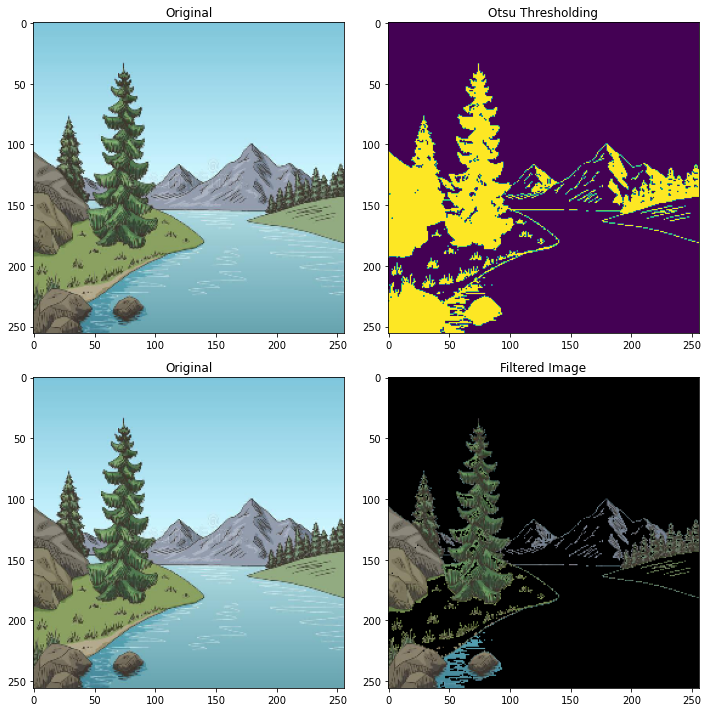

In [14]:
#Image Segmentation using Thresholding
from skimage.filters import threshold_otsu

##Preprocessing the Image
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

##Segmentation Process
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img_rgb, img_otsu)


f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img_rgb)
axarr[0,0].set_title('Original')
axarr[0,1].imshow(img_otsu)
axarr[0,1].set_title('Otsu Thresholding')

axarr[1,0].imshow(img_rgb)
axarr[1,0].set_title('Original')
axarr[1,1].imshow(filtered)
axarr[1,1].set_title('Filtered Image')

f.set_size_inches(10,10)
f.tight_layout()

### Contour Detection

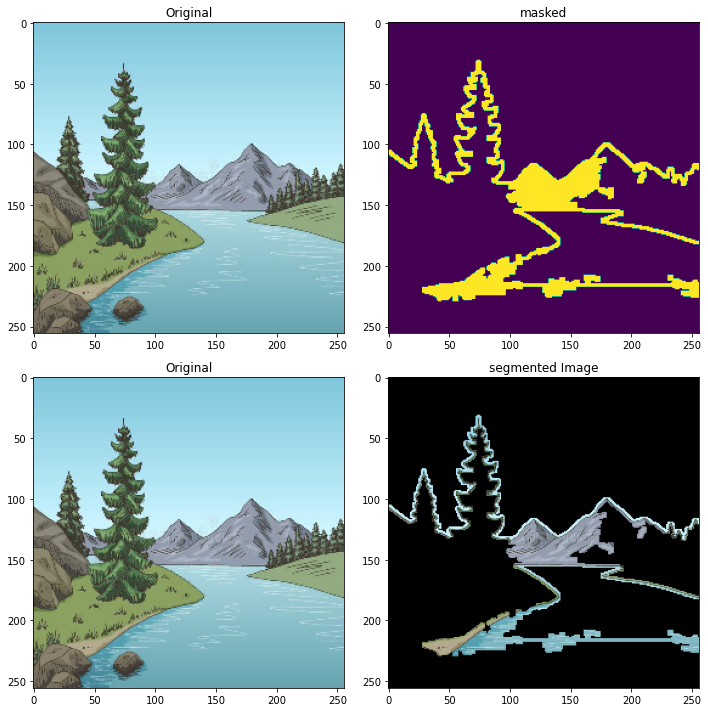

In [17]:
file = 'scenic.jpg'
filepath = '/Users/datascience/Desktop/Desktop - Mac mini/SPRING22/DIP/Week 7/ImageSeg/images'
path = os.path.join(filepath,file)
img = cv2.imread(path)

#Image Segmentation using Contour Detection
img = cv2.resize(img,(256,256))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,100),None)

##Detecting and Drawing Contours
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

##Segmenting the Regions
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Display result
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(img_rgb)
axarr[0,0].set_title('Original')
axarr[0,1].imshow(masked)
axarr[0,1].set_title('masked')

axarr[1,0].imshow(img_rgb)
axarr[1,0].set_title('Original')
axarr[1,1].imshow(segmented)
axarr[1,1].set_title('segmented Image')
f.set_size_inches(10,10)
f.tight_layout()

### Color Masking
Color masking allows the user to view an image with a specified color range. If the pixel color falls outside of the range, then it will not be shown. Here, we see an image of Manchester United vs Chelsea. The colors of the clubs' uniforms had distinct enough colors to segment. With color masking, we can locate the players on the pitch by team. This is another example of assigning labels to pixel values.

For real-time example, follow webcam section below.

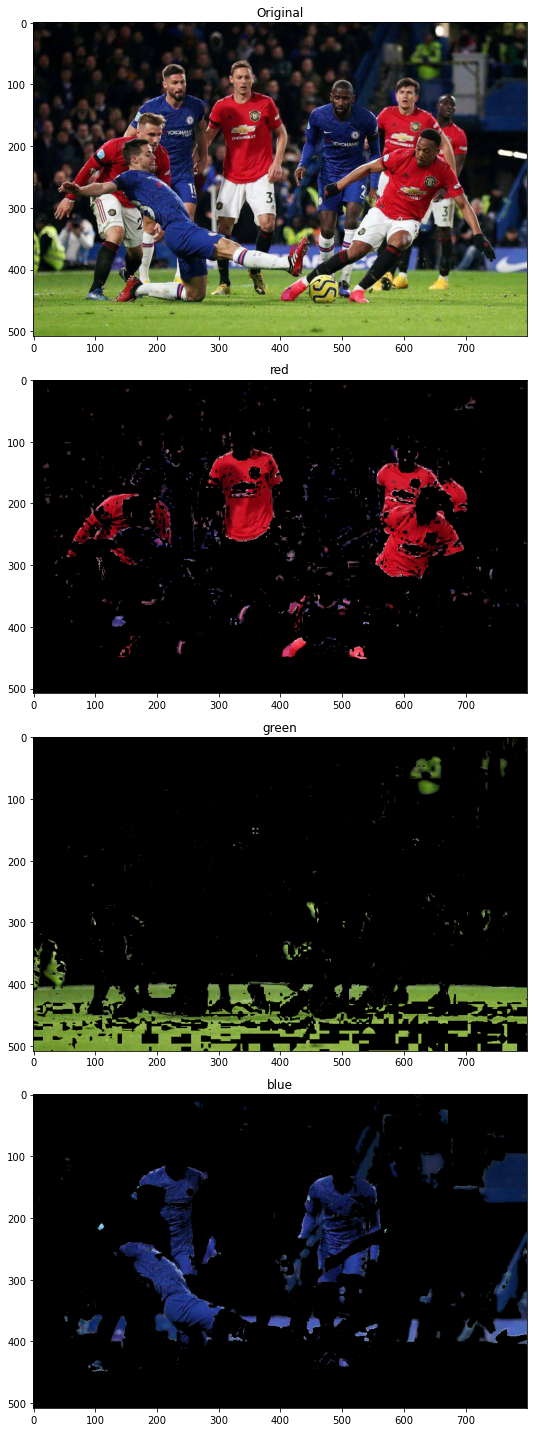

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Load image
img = 'ManuChelsea.jpg'
filepath = '/Users/datascience/Desktop/Desktop - Mac mini/SPRING22/DIP/Week 7/ImageSeg/images'
path = os.path.join(filepath,img)
img = cv2.imread(path)

# Preprocess image
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

#Define the Color Range to be Detected
light_red = (120,50,50)
dark_red = (210,255,255)
light_green = (40, 40, 40)
dark_green = (70, 255, 255)
light_blue = (90, 70, 50)
dark_blue = (128, 255, 255)

# Define Color Detection function
def color_detect(image,color1,color2,):
    img = image
    mask = cv2.inRange(hsv_img, color1, color2)
    result = cv2.bitwise_and(img, img, mask=mask)
    return cv2.cvtColor(result,cv2.COLOR_BGR2RGB)

# Apply color detection
blue = color_detect(img,light_blue,dark_blue)
red = color_detect(img,light_red,dark_red)
green = color_detect(img,light_green,dark_green)

# Plot color segmented image
f, axarr = plt.subplots(4,1)
axarr[0].imshow(rgb_img)
axarr[0].set_title('Original')
axarr[1].imshow(red)
axarr[1].set_title('red')
axarr[2].imshow(green)
axarr[2].set_title('green')
axarr[3].imshow(blue)
axarr[3].set_title('blue')

f.set_size_inches(10,20)
f.tight_layout()

# Color Detect real-time w/ Webcam
Code is currently set to detect red, but more or different colors can be assigned.

In [1]:
import cv2
import numpy as np
import os

cv2.namedWindow('window')

def nothing(x):
    pass

# For webcam, use cv2.VideoCapture(0)
video = cv2.VideoCapture(1200)

# We need to check if camera is opened previously or not
if (video.isOpened() == False):
    print("Error reading video file")
# Read fps and frame count
else:
    # Get frame rate information
    # You can replace 5 with CAP_PROP_FPS as well, they are enumerations
    fps = video.get(5)
    print('Frames per second : ', fps,'FPS')

    # Get frame count
    # You can replace 7 with CAP_PROP_FRAME_COUNT as well, they are enumerations
    frame_count = video.get(7)
    print('Frame count : ', frame_count)

# We need to set resolutions. so, convert them from float to integer.
frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

result = cv2.VideoWriter('filename.avi', cv2.VideoWriter_fourcc(*'MJPG'),15, (size),False)

while (video.isOpened()):
    ret, frame = video.read()
    if ret == True:
        # Convert BGR to HSV
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # define range of red color in HSV
        lower_red = np.array([160,50,50])
        upper_red = np.array([180,255,255])

        #Threshold the HSV image to get only red colors
        mask = cv2.inRange(hsv, lower_red, upper_red)

        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(frame,frame, mask= mask)

        # we are just adding 2 more channels on the mask so we can stack it along other images
        mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

        # stacking up all three images together
        stacked = np.hstack((mask_3,frame,res))

        stacked = cv2.resize(stacked,None,fx=0.8,fy=0.8)
        result.write(stacked)
        cv2.imshow('window',stacked)
        # Press Q on keyboard to stop the process
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # Break the loop
    else:
        break

# When everything done, release the video capture and video write objects
video.release()
result.release()

# Closes all the frames
cv2.destroyAllWindows()

print("The video was successfully saved")

Changed waitThread to realtime priority!
Asked for all format descriptions...
Frames per second :  24.000038 FPS
Frame count :  0.0
The video was successfully saved


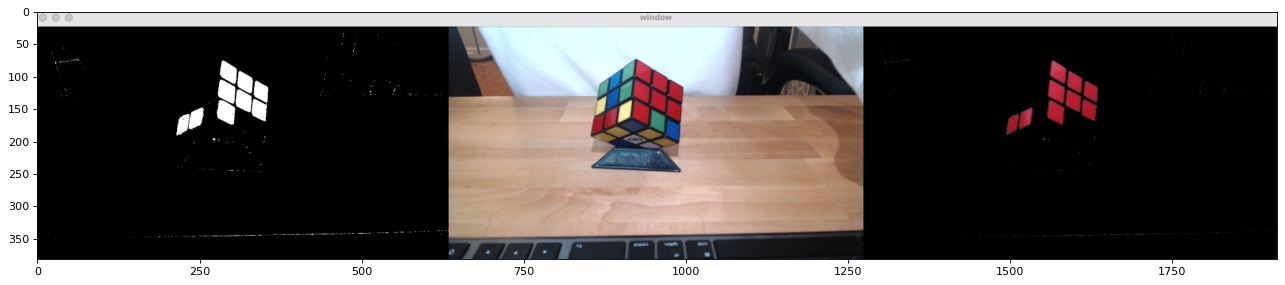

In [7]:
# Load image from file
file = 'example.jpg'
filepath = '/Users/datascience/Desktop/Desktop - Mac mini/SPRING22/DIP/Week 7/ImageSeg'
path = os.path.join(filepath,file)
example_output = cv2.imread(path)
example_output = cv2.cvtColor(example_output, cv2.COLOR_BGR2RGB)
figure(figsize=(20, 10), dpi=80)
plt.imshow(example_output)